In [36]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_absolute_error

In [38]:
from fbprophet import Prophet

# Data Loading and Preprocessing

In [39]:
data = pd.read_csv('international-airline-passengers.csv', usecols=[0, 1])

In [40]:
data.dropna(axis = 0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                                                                             144 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [41]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [42]:
data.columns = ["ds", "y"]
print(data.shape)
data.head(5)

(144, 2)


,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [43]:
data['ds'] = pd.to_datetime(data["ds"])

In [44]:
data.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
ds    144 non-null datetime64[ns]
y     144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


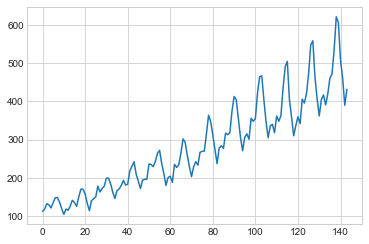

In [46]:
plt.plot(data["y"])
plt.show()

In [47]:
alpha = 0.9
#N = int(alpha * data.shape[0])
N = 100
print(N)

100


In [48]:
data_train = data.iloc[:N].copy()
data_test = data.iloc[N:].copy()

data_train.shape, data_test.shape

((100, 2), (44, 2))

# Training 

In [49]:
data_train.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [15]:
# Python
model = Prophet()
model.fit(data_train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sergeymakarychev/anaconda/envs/deloitte/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [16]:
# Python
#future = m.make_future_dataframe(periods=len(data_test))
#future.tail()

In [17]:
y_test = data_test["y"].values
del data_test["y"]

In [18]:
# Python
forecast = model.predict(data_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
39,1960-08-01,522.888592,505.369683,540.339995
40,1960-09-01,491.486589,474.257878,509.999418
41,1960-10-01,464.632047,446.130549,481.589174
42,1960-11-01,441.220295,423.216165,458.571972
43,1960-12-01,466.763810,447.943905,486.087009


In [19]:
forecast.shape, y_test.shape

((44, 16), (44,))

In [20]:
mape = np.round(mean_absolute_percentage_error(forecast["yhat"], y_test), 3)
mape

8.244

In [21]:
mae = np.round(mean_absolute_error(forecast["yhat"], y_test), 3)
mae

35.226

# Plotting

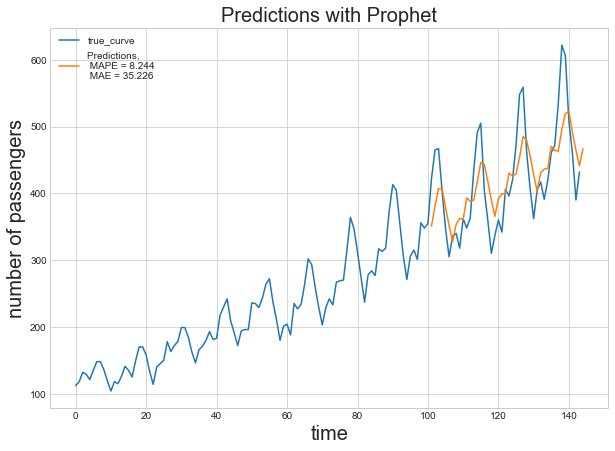

In [24]:
fig = plt.figure(figsize=(10, 7))

plt.plot(data["y"], label = "true_curve")

plt.plot(data_test.index.values + 1, forecast["yhat"],
         label = "Predictions, \n MAPE = {0} \n MAE = {1}".format(mape, mae))


plt.xlabel("time", size = 20)
plt.ylabel("number of passengers", size = 20)
plt.title("Predictions with Prophet", size = 20)
plt.legend()

plt.show()

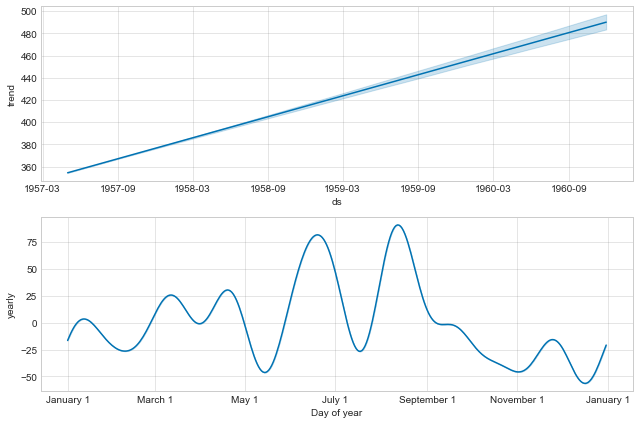

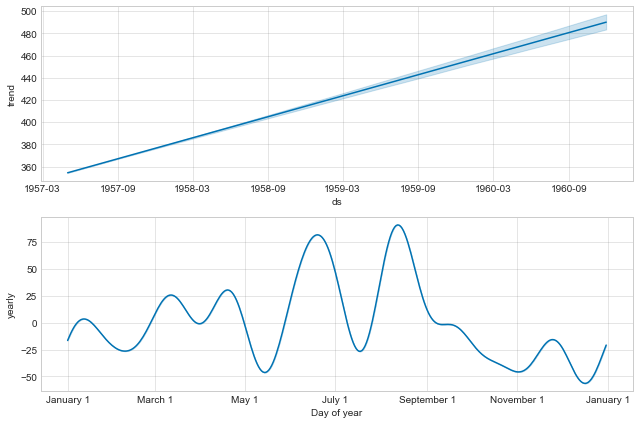

In [27]:
model.plot_components(forecast)

# Using Multiplicative Seasonality

In [51]:
# Python
model = Prophet(seasonality_mode="multiplicative",)
model.fit(data_train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sergeymakarychev/anaconda/envs/deloitte/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [52]:
# Python
forecast_new = model.predict(data_test)
forecast_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
39,1960-08-01,603.155135,580.970173,623.827106
40,1960-09-01,526.470889,506.609037,545.456515
41,1960-10-01,462.110407,443.495946,479.855127
42,1960-11-01,408.994526,391.897878,425.362019
43,1960-12-01,459.921824,441.255870,477.996316


In [55]:
mape_new = np.round(mean_absolute_percentage_error(forecast_new["yhat"], y_test), 3)
mape_new

5.213

In [56]:
mae_new = np.round(mean_absolute_error(forecast_new["yhat"], y_test), 3)
mae_new

22.413

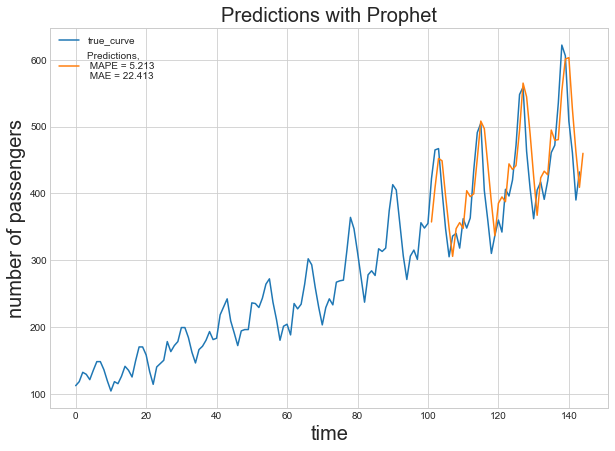

In [58]:
fig = plt.figure(figsize=(10, 7))

plt.plot(data["y"], label = "true_curve")

plt.plot(data_test.index.values + 1, forecast_new["yhat"],
         label = "Predictions, \n MAPE = {0} \n MAE = {1}".format(mape_new, mae_new))


plt.xlabel("time", size = 20)
plt.ylabel("number of passengers", size = 20)
plt.title("Predictions with Prophet", size = 20)
plt.legend()

plt.show()

**Вывод: Использование мультипликативности дало существенное улучшение результата.**